In [2]:
### Install and load packages
# 
# #!pip install uncertainties              # uncomment to install dependancy

from scipy.optimize import curve_fit     # tool for curve fitting
import scipy                             # includes tools for data analysis
import scipy.stats
import numpy as np                       # import the tools of NumPy but use a shorter name, "np"
from matplotlib import pyplot as plt     # tools for plotting
import pandas as pd

import uncertainties as un               # tool set for handling numbers with uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy that uses uncertainty values

### Set global variables

location_data = "../data/"                   ## Use either local folde or github folder. use github locations for Colab
location_styles = "../styles/"
#location_data = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/data/"
#location_styles = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/styles/"

### Read in data set
datafile = "6A-bacteriaSurvival.csv"   # change this file for new data

df = pd.read_csv(location_data+datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="TEMP(K)", 
                 comment = "#") 
display(df)

,TIME (MIN),C51000,C71000
0,0,1430000000,1430000000
1,15,1600000000,1030000000
2,30,927000000,927000000
3,45,282000000,670000000
4,60,315000000,540000000
5,75,534000,540000000
6,90,12100,540000000
7,105,1,163000
8,120,1,1
9,180,1,1


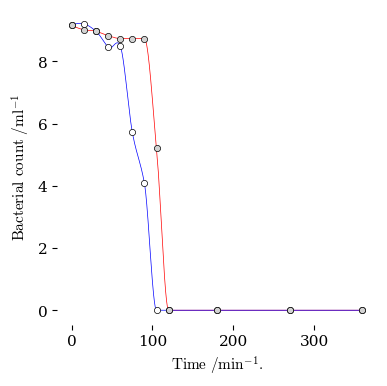

In [32]:
import scipy.interpolate


x = df["TIME (MIN)"]
C51 = df["C51000"]
C71 = df["C71000"]
C51 = np.log10(C51)
C71 = np.log10(C71)

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
#          ylim=[0.01,0.2E10]
       )
#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.CubicSpline(x,C71)
spline = scipy.interpolate.Akima1DInterpolator(x, C71, method="akima")
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, method="makima")

ax.plot(xs,spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.CubicSpline(x,C51)
spline = scipy.interpolate.Akima1DInterpolator(x, C51, method="akima")
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, method="makima")

ax.plot(xs,spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)


plt.savefig("plots/ghgh.pdf")
plt.show()